
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> #### The chosen dataset The Movie Database (TMDb) is a community built movie and TV database and is available on https://www.kaggle.com/tmdb/tmdb-movie-metadata. 
> #### My aim is to explore the relationship between budget and revenues of the films, investigate genres receiving the highest budgets, find out if films with higher budgets receive better ratings, which genre has the highest votes on average and find out the most successful film in terms of revenues.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# load data set 'tmdb-movies.csv' 
# from https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv 
df = pd.read_csv("tmdb-movies.csv", sep=",")

# investigate first 5 rows of the dataset
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#investigate first row of the dataframe
df.iloc[0]

id                                                                 135397
imdb_id                                                         tt0369610
popularity                                                        32.9858
budget                                                          150000000
revenue                                                        1513528810
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
homepage                                    http://www.jurassicworld.com/
director                                                  Colin Trevorrow
tagline                                                 The park is open.
keywords                monster|dna|tyrannosaurus rex|velociraptor|island
overview                Twenty-two years after the events of Jurassic ...
runtime                                                               124
genres                          Action

In [4]:
# investigate last 10 rows of the dataset
df.tail(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10856,20277,tt0061135,0.140934,0,0,The Ugly Dachshund,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,NaN,Norman Tokar,A HAPPY HONEYMOON GOES TO THE DOGS!...When a G...,...,The Garrisons (Dean Jones and Suzanne Pleshett...,93,Comedy|Drama|Family,Walt Disney Pictures,2/16/66,14,5.7,1966,0.000000,0.0
10857,5921,tt0060748,0.131378,0,0,Nevada Smith,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,NaN,Henry Hathaway,Some called him savage- and some called him sa...,...,Nevada Smith is the young son of an Indian mot...,128,Action|Western,Paramount Pictures|Solar Productions|Embassy P...,6/10/66,10,5.9,1966,0.000000,0.0
10858,31918,tt0060921,0.317824,0,0,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,NaN,Norman Jewison,IT'S A PLOT! ...to make the world die laughing!!,...,"Without hostile intent, a Soviet sub runs agro...",126,Comedy|War,The Mirisch Corporation,5/25/66,11,5.5,1966,0.000000,0.0
10859,20620,tt0060955,0.089072,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,NaN,John Frankenheimer,NaN,...,A secret organisation offers wealthy people a ...,100,Mystery|Science Fiction|Thriller|Drama,Gibraltar Productions|Joel Productions|John Fr...,10/5/66,22,6.6,1966,0.000000,0.0
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.000000,0.0
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
# return dimensions of the dataframe
df.shape

(10866, 21)

In [6]:
# return statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# return info on dataframe (number and name of columns, rows, data types of columns, number of entries in columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
# return number of duplicates
sum(df.duplicated())

1

In [9]:
# return number of null-values of each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Relevant findings: 1 duplicate, non-relevant columns and null-values to be dropped,  columns containing multiple values separated by pipe (|). In the following section "Data Cleaning" these findings will be considered. 



### Data Cleaning (delete duplicates, drop non-relevant columns, delete null values, split column)

> #### The following steps will be taken to clean data:

> #### 1) drop duplicates to eliminate identical data
> #### 2) drop non-relevant columns (imdb_id, homepage, overview, production_companies, tagline, release_date) as they are not needed to answer the questions
> #### 3) drop rows with null values in "genres" to do further exploratory data analysis using column "genre"  
> #### 4) split column "genres" to get unique genre names

In [10]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
sum(df.duplicated())

0

#### all duplicates in the dataframe have been deleted 



In [12]:
#drop columns
df.drop(["imdb_id", "homepage", "production_companies", "overview", "tagline","release_date" ], axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
keywords          9372 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


#### non-relevant rows in the dataframe have been deleted 

In [14]:
#drop null values in genres

df=df[df['genres'].notnull()]


In [15]:
df.isnull().sum()

id                   0
popularity           0
budget               0
revenue              0
original_title       0
cast                75
director            42
keywords          1475
runtime              0
genres               0
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
dtype: int64

#### all null-values in column "genres" have been deleted 

In [16]:
#split columns

df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])

In [17]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action,2947,7.3,2015,1.747999e+08,1.385749e+09


#### in column "genres" all values after the first pipe | value were deleted and only the first value was kept

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Is there a connection between budget and revenue?

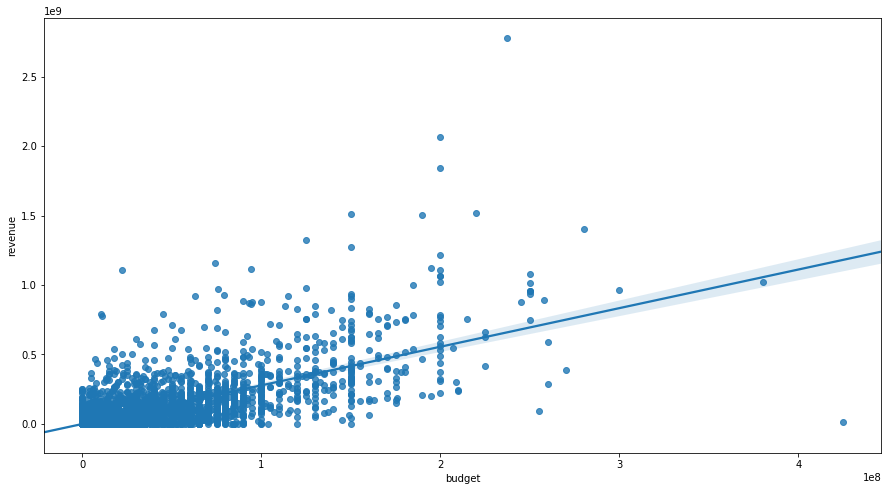

In [18]:
# use the function regplot to make a scatterplot with a trend line
plt.figure(figsize=(15,8))
sns.regplot(x=df["budget"], y=df["revenue"])

 


> ##### This scatterplot shows the variable "revenue" as the dependent variable and "budget" as the independent variable. This plot is relevant for showing the dependency between revenue and budget. A trend line also helps to outline the relationship between these two variables.

> #### Result: the scatterplot shows a clear positive relationship between budget and revenue.

### Research Question 2: Which are the top three genres receiving the highest average budgets?

In [33]:
# Group data by genre and calculate the mean values of each column.
# Show the column "budget". Save series as dataframe "genres_budget".
genres_budget = df.groupby("genres").mean().budget
genres_budget = genres_budget.to_frame(name=None)
genres_budget

,budget
genres,
Action,4.231958e+07
Adventure,6.477152e+07
Animation,6.099603e+07
Comedy,2.318680e+07
Crime,2.271513e+07
Documentary,3.446621e+06
Drama,2.145089e+07
Family,5.182134e+07
Fantasy,4.588527e+07


In [34]:
# drop row "foreign" 
genres_budget=genres_budget.dropna()

In [35]:
# sort budget values in dataframe "genres_budget"
genres_budget = genres_budget.sort_values('budget')
genres_budget

,budget
genres,
Documentary,3.446621e+06
TV Movie,3.900000e+06
Horror,1.137138e+07
Drama,2.145089e+07
Crime,2.271513e+07
Comedy,2.318680e+07
Mystery,2.339429e+07
Romance,2.494572e+07
Thriller,2.635576e+07


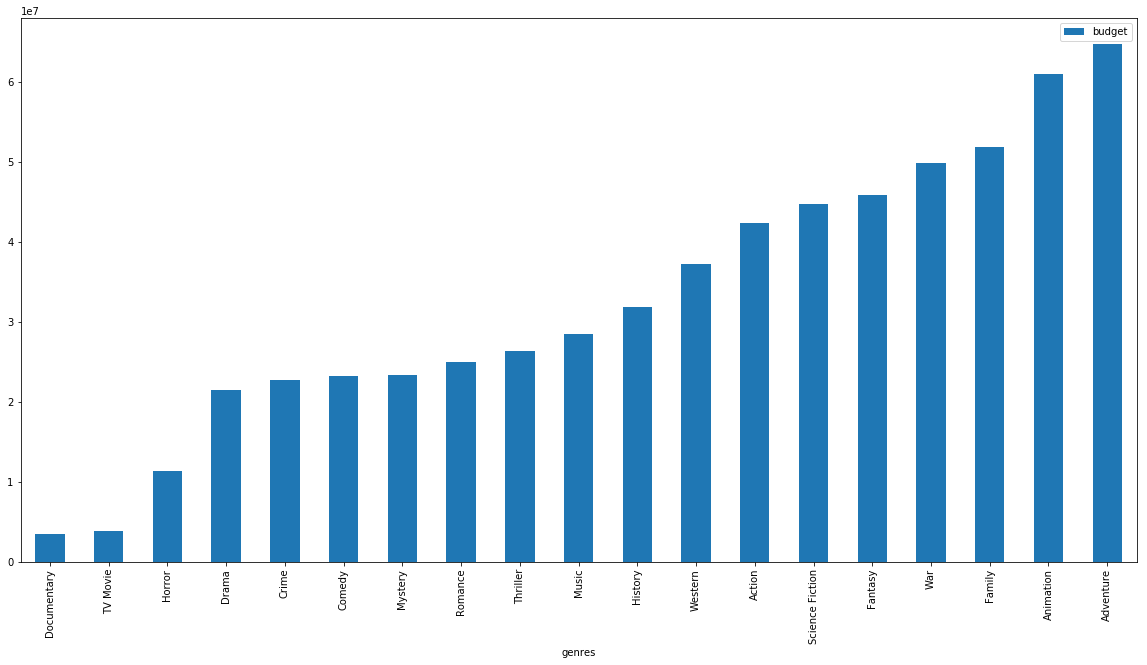

In [36]:
# generate bar chart for each genre (x-axis = genre, y-axis = budget)
genres_budget.iloc[:,:].plot(kind="bar", figsize=(20,10))

> ##### This bar chart plots genres on the x-axis and average budget per genre on the y-axis. It is relevant for expressing the distribution of the average budget per genre. The average budget values per genre are sorted in ascending order so that the top three genres in terms of average budget can be quickly identified.

> #### Result: The genres Adventure, Animation and Family receive the highest budgets on average

### Research Question 3:  What is the most successful film of all times in terms of revenue?

In [23]:
# find row in column "revenue" with the highest value
film = df.loc[df['revenue'].idxmax()]
film = film.to_frame(name=None)
film

,1386
id,19995
popularity,9.43277
budget,237000000
revenue,2781505847
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
keywords,culture clash|future|space war|space colony|so...
runtime,162
genres,Action


In [24]:
# select rows "revenue" and "original_title"
film = film.iloc[3:5, 0]
film 

revenue           2781505847
original_title        Avatar
Name: 1386, dtype: object

In [25]:
# search film "Avatar" in original dataframe
df[df["original_title"]=="Avatar"]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action,8458,7.1,2009,2.408869e+08,2.827124e+09


#### Result: the most successful film in terms of revenues is the film "Avatar"

### Research Question 4: Do films with higher budget receive higher average ratings?

In [26]:
# replace all values "0" in column "budget" with "NAN" so that the mean can be calculated
df['budget'] = df['budget'].replace(0, np.NAN)

In [27]:
# calculate median
df.budget.median()

17000000.0

In [28]:
# create two dataframes, one for all rows with budget values below the median 
# and one for all rows with budget values higher than the median
low_budget = df[df["budget"] < 17000000]

high_budget = df[df["budget"] >= 17000000]

In [29]:
# calculate the mean value of votes for each dataframe
low_budget.vote_average.mean(), high_budget.vote_average.mean()

(5.9854940711462445, 6.0783548142532222)

#### Result: films with a budget higher than the median level are rated slightly better than films with budgets lower than the median level

### Research Question 5: Which genre has the highest votes on average?

In [30]:
# Group data by genre and calculate the mean values of each column.
# Show the column "vote_average". Save series as dataframe "df1".
df1 = df.groupby("genres").mean().vote_average
df1 = df1.to_frame(name=None)
df1


,vote_average
genres,
Action,5.752327
Adventure,6.052048
Animation,6.414888
Comedy,5.882924
Crime,6.217632
Documentary,6.923380
Drama,6.200448
Family,5.945833
Fantasy,5.795956


In [31]:
# find row in column "vote_average" with the highest value
df1.loc[df1['vote_average'].idxmax()]


vote_average    6.92338
Name: Documentary, dtype: float64

#### Result: The genre "documentary" has the highest average votes.

<a id='conclusions'></a>
## Conclusions

> **encountered limitation 1**: The column "genre" originally included one or more genres per film separated by a pipe "|" sign. I assumed that the main genre of each film was the first value in column "genre" left to the first pipe "|" sign. This might have affected my analysis in the way genres could be structured a little different. Nonetheless the scatter plot and the bar chart show clear tendencies. 

> **encountered limitation 2**: The difference in ratings of low budget and high budget films (see question 4) is very low (5.99 and 6.08). This implies that a high budget film does not have higher ratings in any case.

> **Answer to Research Question 1: Is there a connection between budget and revenue?**: There is obviously a connection between budget and revenue insofar as the amounts of revenues increase the higher the budgets are. This tendency is expressed by the scatter plot drawing the budget on the x-axis and revenues on the y-axis. 

> **Answer to Research Question 2: Which are the top three genres receiving the highest average budgets?**: The bar chart shows the genres in ascending order so that the top three genres can be found on the right. They are Adventure, Animation and Family and receive the highest budgets on average. This is no wonder since animation and adventure films require sophisticated computer simulations. 

> **Answer to Research Question 3: What is the most successful film of all times in terms of revenue?** The film that generated the most revenues is "Avatar". This is conclusive since this film falls into the genre "Action" which also receives quite a lot of budget on average.

> **Answer to Research Question 4: Do films with higher budget receive higher average ratings?** It can be observed that films with higher budgets receive slightly higher average ratings. This is conclusive in that higher budgets may also lead to better marketing campaigns reaching more people.

> **Answer to Research Question 5: Which genre has the highest votes on average?** The genre "documentary" has the highest average votes which is especially interesting since this genre receives the least budget on average and should therefore be expected to have low ratings. An explanation maybe that a documentary doesn't require special effects or expensive actors.




In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0